# Deep Learning Lab Assignment-1 

### Name: Bagwe Sarvesh                                  ||                                                       Student ID: 202211006

# Importing Useful Libraries for the tasks

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

# Creating Classes for Regression and Classification

### Multiple Linear Regression (implemented using Class)

In [2]:
class Multiple_Linear_Regression:
    
    # Initialization
    def __init__(self,x,y,step_size = 0.001,iterations = 10):
        
        # saving parameters on each iterations (particular for this dataset)
        self.w1=[]
        self.w2=[]
        self.b=[]
        
        # Finding no of features in the dataset
        a=x.shape
        a=int(a[1])
        
        # standardizing the inputs and outputs for better convergence 
        self.scalersx = StandardScaler()  
        self.scalersy= StandardScaler()
        
        # Input Features
        x=np.array(x)  
        self.x =x
        self.x =self.scalersx.fit_transform(self.x)
        self.x=np.c_[self.x, np.ones(len(x))]
        
        # Output Features
        y= np.array(y)
        y= y.reshape([len(x),1])
        self.y =y
        self.y=self.scalersy.fit_transform(self.y)
        
        # Initializing Weights 
        self.w = np.ones(a+1)
        self.w = self.w.reshape([a+1,1])
        
        # Step size and number of iterations (epochs)
        self.delta = step_size
        self.iterations = iterations
        
        # storing cost for every iteration
        self.cost=[]
    
    # function to calculate gradient 
    def gradient(self): 
        temp = np.dot(self.x,self.w) - self.y
        xx=np.transpose(self.x)
        grad =np.dot(xx,temp)
        grad = grad/len(self.x)
        return grad
    
    def gradient_descent(self):
        
        # Iteration Counter 
        iters=0
        while iters<=self.iterations:  # Terminating Condition
            
            grad = self.gradient()
            
            # Updating weights (includes bias term)
            self.w = self.w - (self.delta*grad) 
            self.w1.append(self.w[1][0])
            self.w2.append(self.w[0][0])
            self.b.append(self.w[2][0])
            # Cost at every iteration
            cst = np.sum((((self.x.dot(self.w)) - self.y) ** 2) / (2*len(self.y)))
            self.cost.append(cst)
            iters+=1
        
        print(f"Training Completed with learning rate: {self.delta}")
    
    # function to predict on the new data
    def predict(self,X):
        # Transforming the test data for prediction 
        X=np.array(X)
        X=self.scalersx.transform(X)
        X=np.c_[X, np.ones(len(X))]
        
        # Ouptut
        pred = np.matmul(X,self.w)
        pred = self.scalersy.inverse_transform(pred) 
        return pred 
    
    # Plots the value of weights over iterations
    def cost_plot(self):
        plt.plot(self.w1)
        plt.plot(self.w2)
        plt.plot(self.cost)
        plt.legend(["'$\\theta_{1}$'","'$\\theta_{2}$'","Loss function"])
        plt.title('Values of $\\theta$ and $J(\\theta)$ over iterations')
        plt.xlabel("Number of iterations")
        plt.ylabel("'$\\theta$' and cost")
        plt.show()
    
    # Plotting Contours
    def params(self):
        return self.cost
    
    def compute_cost(self,X, y, theta):
        m = len(y)
        J=0
        theta=theta.reshape(3,1)
        h_x = np.dot(X,theta)
        error_term = sum((h_x - y)**2)
        loss = error_term/(2*m)
       
        return loss
    
    # For plotting Contour plot
    def contours(self):
        
        # taking sample value of weights nearby our actual convergence point
        theta2 = np.linspace(-1,2,400)
        theta1 = np.linspace(-1,2,400)
        
        #Cost Values for each set of weights 
        J_vals = np.zeros((len(theta2), len(theta1))) 
        
        for i in range(len(theta2)):
            for j in range(len(theta1)):
                t = np.array([theta2[i], theta1[j],self.b[10]])
                J_vals[i][j] = self.compute_cost(self.x, self.y, t).tolist()[0]
        
        # Plotting Contours
        plt.contourf(theta2, theta1, J_vals)
        plt.plot(self.w1,self.w2,"r+")
        plt.xlabel("feature 1 weights")
        plt.ylabel("feature 2 weights")
        plt.title("Contour Plot of weights")
        
    # Returns all the learnt parameters   
    def get_parameters(self):
        return self.x,self.y,self.w1,self.w2,self.b,self.w,self.cost
        

### Logistic Regression (implemented using Class)

In [3]:
class Logistic_Regression:
    
    def __init__(self,X,y,iters,step_size=0.01):
        
        # Normalizing input data
        self.scaler = StandardScaler()
        X=self.scaler.fit_transform(X)
        self.X= X
        
        m,n=X.shape
        self.m=m
        
        y=np.array(y)
        y=y.reshape(m,1)
        self.y= y
        
        # Initializing Weights and Bias 
        self.w= np.zeros((n,1))
        self.b= 0 
        self.w1=[]
        self.w2=[]
        # storing loss at every iteration 
        self.loss=[]
        self.iters=iters
        
        # Learning Rate
        self.lr =step_size
    
    # Mathematical Sigmoid function
    def sigmoid(self,z):
        return 1.0/(1 + np.exp(-z))
    
    # Gradient Descent optimization for Logistic Regression
    
    def gradient_descent(self):
        for i in range(self.iters):
            
            y_hat = self.sigmoid(np.dot(self.X,self.w)+self.b)
            
            # Calculating gradients
            dw = (1/self.m)*np.dot(self.X.T, (y_hat - self.y))
            db = (1/self.m)*np.sum((y_hat - self.y))
            
            # parameter update
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
            self.w1.append(self.w[0][0])
            self.w2.append(self.w[1][0])
            # calculating and storing loss at every iteration 
            ls = -np.mean(self.y*(np.log(y_hat)) - (1-self.y)*np.log(1-y_hat))
            self.loss.append(ls)
        
    
    # function to predict on given data
    def predict(self,X,threshold=0.5):
        X= self.scaler.transform(X)
        pred = self.sigmoid(np.dot(X,self.w)+self.b)
        predictions=[]
        predictions=[1 if i > threshold else 0 for i in pred]
        
        return np.array(predictions)
    
    # Classification Visualization
    def plot_boundary(self):
        X=self.X
        w= self.w
        b= self.b
        
        x1 = [min(X[:,0]), max(X[:,0])]
        m = -w[0]/w[1]
        c = -b/w[1]
        x2 = m*x1 + c
    
        # Plotting
        fig = plt.figure(figsize=(10,8))
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.xlabel("feature 1")
        plt.ylabel("feature 2")
        plt.title('Decision Boundary')
        plt.plot(x1, x2, 'y-')
        plt.legend(["Class 0","Class 1","Decision Boundary"])
    
    def compute_cost(self,x,y,t):
        
        t = t.reshape(2,1)
        h_x = np.dot(x,t)
        y_hat = self.sigmoid(h_x)
        m=len(y)
        error =  sum(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        loss = error/m
        
        return loss
    
# Function to plot Contours
    def contours(self):
        
        # taking sample value of weights nearby our actual convergence point
        theta2 = np.linspace(0,2,400)
        theta1 = np.linspace(0,2,400)
        
        #Cost Values for each set of weights 
        J_vals = np.zeros((len(theta2), len(theta1))) 
        
        for i in range(len(theta2)):
            for j in range(len(theta1)):
                t = np.array([theta2[i], theta1[j]])
                J_vals[i][j] = self.compute_cost(self.X, self.y, t).tolist()[0]
        
        # Plotting Contours
        plt.contourf(theta1, theta2, J_vals)
        plt.plot(self.w2,self.w1,"r+")
        plt.xlabel("feature 1 weights")
        plt.ylabel("feature 2 weights")
        plt.title("Contour Plot of weights")
        plt.xlim([0,1.5])
        plt.ylim([0,2])
    def get_params(self):
        return self.x,self.y,self.w1,self.w2,self.b,self.w,self.loss

## Some other functions

In [4]:
# Root Mean Square Error
def RMSE(y_pred,y_true):
    y_true= np.array(y_true)
    y_true= y_true.reshape([len(y_pred),1])
    MSE=np.square(np.subtract(y_true,y_pred)).mean()
    RMSE= math.sqrt(MSE) 
    return RMSE


# Classification Metrics 
def compute_metrics(y_act, y_pred):
    '''
    True positive - actual = 1, predicted = 1
    False positive - actual = 1, predicted = 0
    False negative - actual = 0, predicted = 1
    True negative - actual = 0, predicted = 0
    '''
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    
    Accuracy= ((tp + tn) * 100)/ float( tp + tn + fn + fp)
    Precision= (tp  * 100)/ float( tp + fp)
    Recall = (tp  * 100)/ float( tp + fn)
    f1_score = (2*Precision*Recall)/ (Precision + Recall)
    
    print(f"Accuracy of the model: {Accuracy}")
    print(f"Precision of the model: {Precision}")
    print(f"Recall of the model: {Recall}")
    print(f"F1 Score of the model: {f1_score}")

    

# Working with datasets 

#  Dataset: 50_startups  

In [5]:
df50 = pd.read_csv("50_Startups.csv")
df50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df50.drop(["State"],inplace=True,axis=1)
df50.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


As per the instructions we have to consider only two features from the dataset

* Correlation of R&D soend and marketing spend is high.
* Therefore, we are considering only R&D spend and Administration

In [7]:
X = df50.iloc[:,:2]
Y = df50["Profit"]

### Using different learning rates to train model 

Training Completed with learning rate: 0.001
Training Completed with learning rate: 0.01
Training Completed with learning rate: 0.1


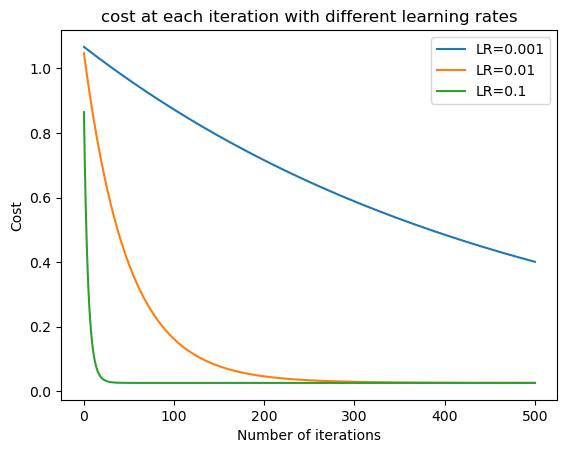

In [8]:
step_size = [0.001,0.01,0.1]
for i in step_size:
    MLR = Multiple_Linear_Regression(X,Y,step_size = i,iterations = 500)
    MLR.gradient_descent()
    prs=MLR.params()
    plt.plot(prs)
plt.legend(["LR=0.001","LR=0.01","LR=0.1"])
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("cost at each iteration with different learning rates")
plt.show()

### Final Model with hyperparameters: Learning Rate = 0.1 and Iterations = 500

In [9]:
MLR = Multiple_Linear_Regression(X,Y,step_size = 0.1,iterations = 500)
MLR.gradient_descent()

Training Completed with learning rate: 0.1


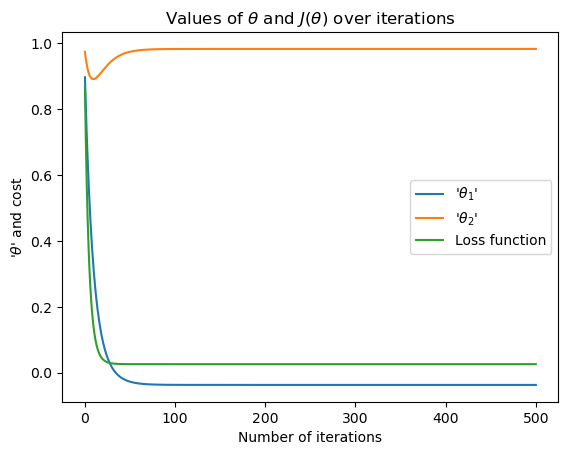

In [10]:
MLR.cost_plot()

### Contour Plot

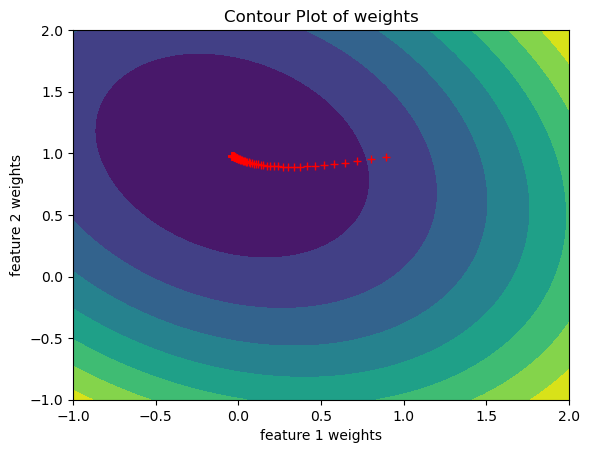

In [11]:
MLR.contours()

#### Calculating Root Mean Squared Error

In [12]:
Y_pred= MLR.predict(X)
error = RMSE(Y_pred,Y)
print(f"Root Mean Square Error: {error} ")

Root Mean Square Error: 9115.197927536368 


#### Sklearn's Linear Regression Model and Result

In [13]:
from sklearn.linear_model import LinearRegression
MLRS = LinearRegression()
MLRS.fit(X,Y)
Y_preds= MLRS.predict(X)
errors = RMSE(Y_preds,Y)
print(f"Root Mean Square Error on Sklearn MLR: {errors} ")

Root Mean Square Error on Sklearn MLR: 55687.574795710054 


### Model Comparision

| Model | RMSE |
| --- | --- |
| Sklearn Linear Regression | 55687.57 |
| Multiple Linear Regression (self) | 9115.19 |





# Dataset: User_Data



In [14]:
df = pd.read_csv("User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data preprocessing and seperating dataset into features and labels 

In [15]:
# Label Encoding of feature (Gender)

le = LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [17]:
df.drop(["User ID"],inplace=True,axis=1)
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


* Here User ID is not useful. Therefore, we dropped it. 
* Gender seems to be less useful 

In [18]:
x= df.iloc[:,1:3]
y= df.iloc[:,-1]

### Training Logistic Regression Model  

Hyperparameters: Iterations = 200 and Learning Rate = 0.1

In [19]:
LR = Logistic_Regression(x,y,2000,0.1)
LR.gradient_descent()

### Classification Metrics

In [20]:
y_pred = LR.predict(x)
compute_metrics(y,y_pred)


Accuracy of the model: 84.5
Precision of the model: 82.92682926829268
Recall of the model: 71.32867132867133
F1 Score of the model: 76.69172932330828


### Sklearn's Logisitc Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LRS=LogisticRegression(max_iter=2000)
LRS.fit(x,y)
y_preds= LRS.predict(x)
print(f"Accuracy of Sklearn's Logistic Regression: {accuracy_score(y,y_preds)*100}")


Accuracy of Sklearn's Logistic Regression: 64.25


### Model Comparision

| Model | Accuracy |
| --- | --- |
| Sklearn Logistic Regression | 64.25 |
| Logistic Regression (self) | 84.5 |

### Classification Visualisation

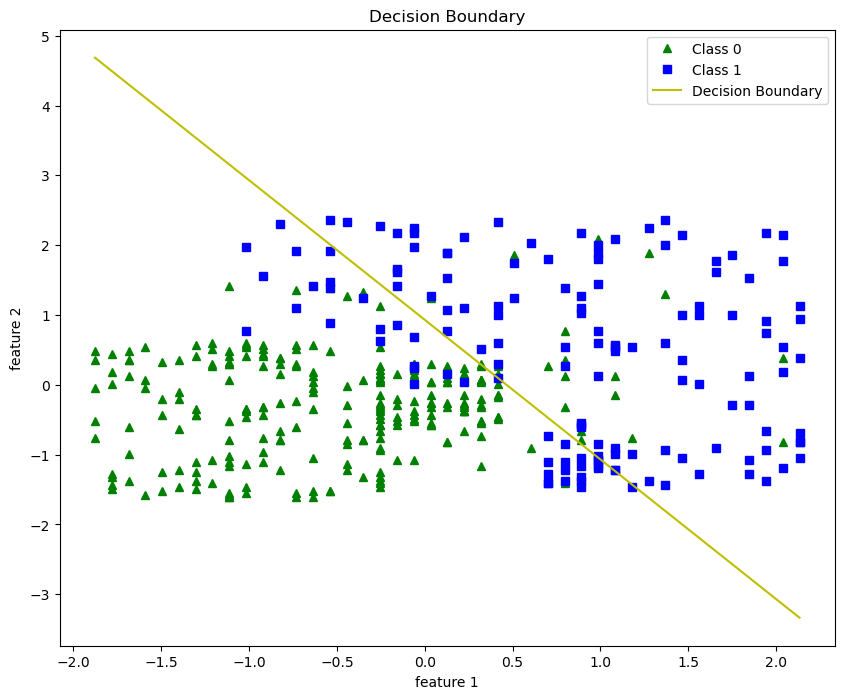

In [22]:
LR.plot_boundary()

####  Here features are Age and Income.
####  The values of the features are normalized. 

### Confusion Matrix

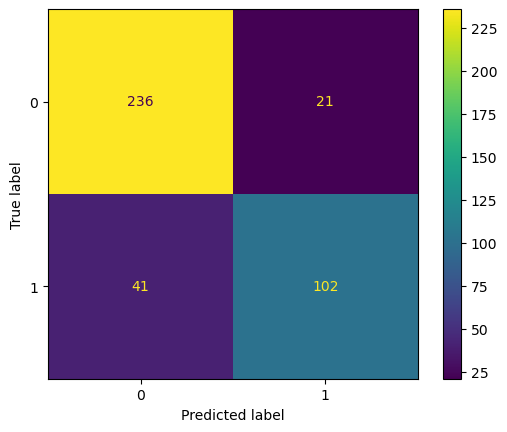

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

* Considering only two features the classifer seperates classes properly to a good extent 


### Contour Plot

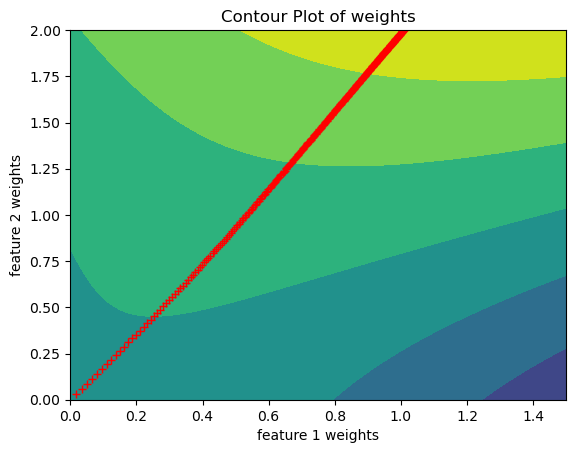

In [24]:
LR.contours()

### |References|

* Presentations from Deep Learning Lectures
* Geeks for Geeks
* Medium
* Towards Data Science


##### Note: Codes are not copied but articles were read to understand the concepts, especially for contour plotting multiple articles from above references were referred.